In [1]:
!pip install -q sentence-transformers

In [2]:
from sentence_transformers import SentenceTransformer
model =SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
sentences=[
    "Surya Kant is deeply passionate about technology and innovation.",
"He loves exploring artificial intelligence, machine learning, and the latest digital tools that make life smarter and more efficient.",
"Coding isn’t just a skill for him — it’s a form of creativity and problem-solving.",
"He often spends time experimenting with new projects, constantly learning and improving his technical abilities to stay ahead in the fast-changing tech world.",


    "Surya Kant is a true food lover who enjoys discovering new tastes and dishes.",
"He has a special love for spicy biryani and delicious street food, but he also appreciates the comfort of simple home-cooked meals.",
"Whenever he gets a chance, he explores cafés with friends and tries unique cuisines.",
"For him, food is not just about eating — it’s about enjoying flavors, culture, and good company.",


    "Surya Kant believes in living a balanced and meaningful life.",
"He starts his mornings with calm walks to refresh his mind and stays focused on his goals throughout the day.",
"Music, creativity, and mindfulness are an important part of his routine.",
"Even with a busy schedule, he manages to stay positive, fit, and inspired — blending productivity with peace in his everyday lifestyle.",

]

In [4]:
embeddings=model.encode(sentences)

In [5]:
import numpy as  np
from numpy.linalg import norm
def cosine_similarity(a,b):
  return np.dot(a,b) / (norm(a)*norm(b))
def euclidean_distace(a,b):
  return norm(a-b)
def dot_product(a,b):
  return np.dot(a,b)


In [6]:
pairs=[
    (0,1),
    (0,2)
]
for idx1,idx2 in pairs:
  emb1=embeddings[idx1]
  emb2=embeddings[idx2]
  print(f"{sentences[idx1]}\n{sentences[idx2]}\n")
  print(f"Cosine similarity: {cosine_similarity(emb1,emb2)}")
  print(f"Euclidean distance: {euclidean_distace(emb1,emb2)}")
  print(f"Dot product: {dot_product(emb1,emb2)}")

Surya Kant is deeply passionate about technology and innovation.
He loves exploring artificial intelligence, machine learning, and the latest digital tools that make life smarter and more efficient.

Cosine similarity: 0.4243839383125305
Euclidean distance: 1.0729548931121826
Dot product: 0.42438390851020813
Surya Kant is deeply passionate about technology and innovation.
Coding isn’t just a skill for him — it’s a form of creativity and problem-solving.

Cosine similarity: 0.27607694268226624
Euclidean distance: 1.203264832496643
Dot product: 0.27607694268226624


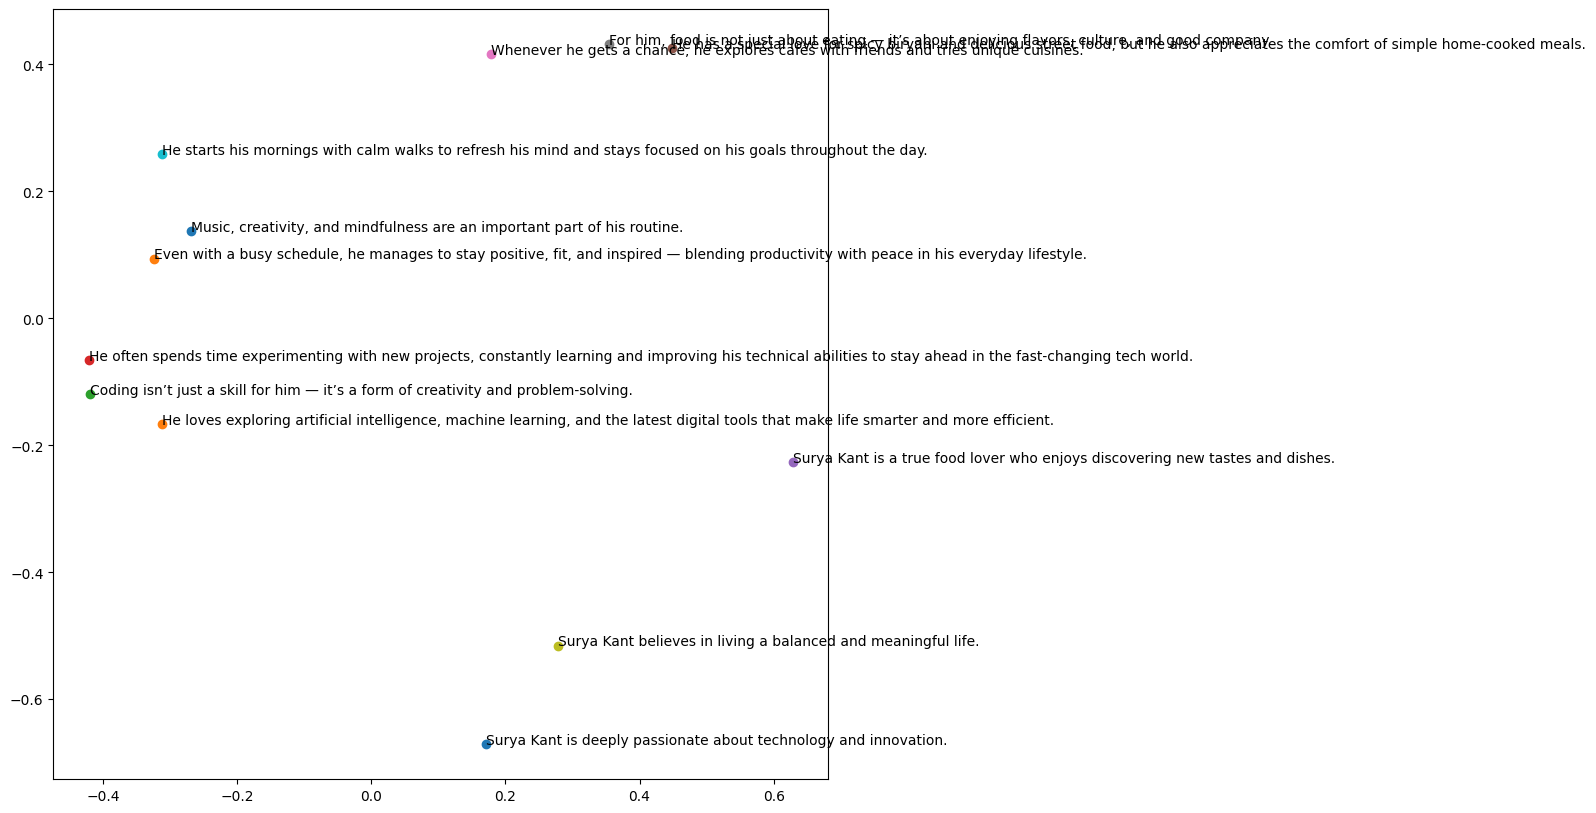

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
embeddings_2d=pca.fit_transform(embeddings)
plt.figure(figsize=(10,10))
for i, label in enumerate(sentences):
  plt.scatter(embeddings_2d[i,0],embeddings_2d[i,1])
  plt.annotate(label,xy=(embeddings_2d[i,0],embeddings_2d[i,1]))
plt.show()

In [8]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

def semantic_search(query, corpus, corpus_embeddings, model, top_k=5):
    # Convert top_k to int and validate
    try:
        top_k = int(top_k)
    except ValueError:
        raise ValueError("top_k must be an integer.")

    if top_k <= 0:
        raise ValueError("top_k must be greater than zero.")

    query_embedding = model.encode([query], convert_to_tensor=True)

    similarity = util.cos_sim(query_embedding, corpus_embeddings)[0]

    similarity_np = similarity.cpu().numpy()

    sorted_indices = np.argsort(similarity_np)[::-1]

    top_k = min(top_k, len(corpus))
    top_k_indices = sorted_indices[:top_k]

    print(f"\nQuery: {query}\nTop {top_k} results:")
    for idx in top_k_indices:
        print(f"Score: {similarity_np[idx]:.4f}")
        print(f"{corpus[idx]}\n")


In [10]:
query = "What Surya Kant believes?"
semantic_search(query, sentences, embeddings, model)


Query: What Surya Kant believes?
Top 5 results:
Score: 0.7406
Surya Kant believes in living a balanced and meaningful life.

Score: 0.6214
Surya Kant is a true food lover who enjoys discovering new tastes and dishes.

Score: 0.5781
Surya Kant is deeply passionate about technology and innovation.

Score: 0.2522
Music, creativity, and mindfulness are an important part of his routine.

Score: 0.2113
He has a special love for spicy biryani and delicious street food, but he also appreciates the comfort of simple home-cooked meals.

